In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
X_train = tf.image.resize(X_train, [64, 64]).numpy()
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)
X_test = tf.image.resize(X_test, [64, 64]).numpy()
X_train, X_test = X_train / 255.0, X_test / 255.0

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
for layer in vgg_model.layers[:10]:

model = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

datagen = ImageDataGenerator()
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

   history = model.fit(train_generator, epochs=10, validation_data=test_generator)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1042/1875 ━━━━━━━━━━━━━━━━━━━━ 47:36 3s/step - accuracy: 0.5573 - loss: 1.2854

In [ ]:
import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")
print(f"Test loss: {test_loss:.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


#3. Implement the backpropagation algorithm from scratch and verify its correctness.

#2. Build a multi-layer feedforward neural network to solve a classification problem.

#4. Visualize how the weights of a neural network change during training.

## Self - instance of the class itself.

Epoch 0/20, Loss: 0.08785367539363488
Epoch 5/20, Loss: 0.01787156538092267
Epoch 10/20, Loss: 0.010844491272698879
Epoch 15/20, Loss: 0.005498684576867228
Test Accuracy: 97.84%


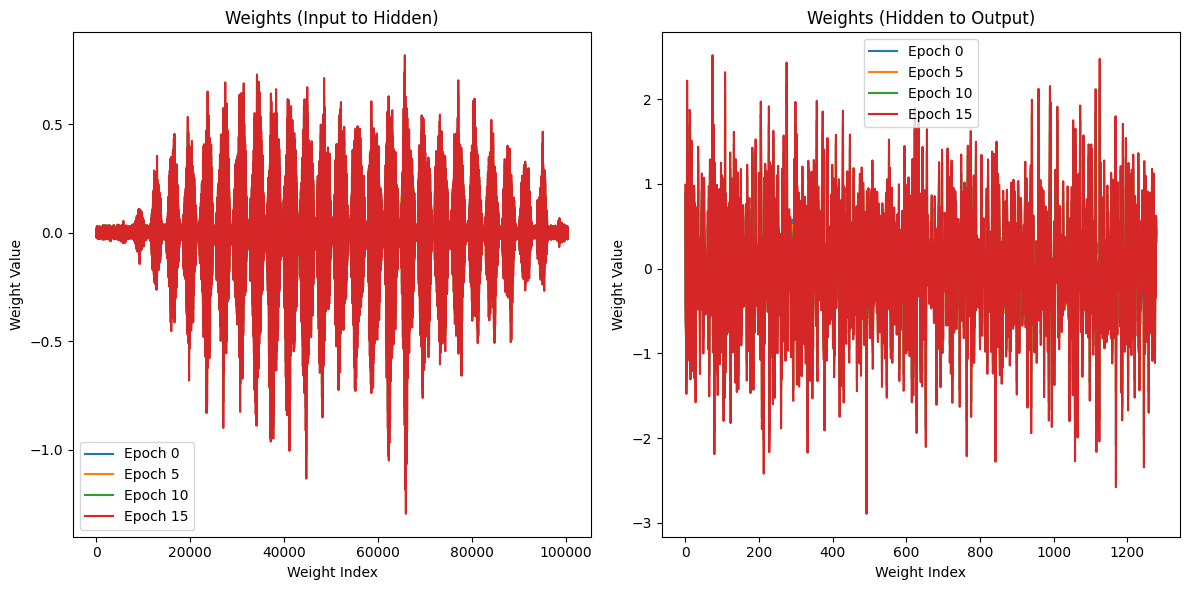

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Neural Network class with backpropagation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

        # For plotting
        self.weight_history_input_hidden = []
        self.weight_history_hidden_output = []

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = softmax(self.final_input)
        return self.final_output

    def backward(self, X, y, output):
        error_output = output - y
        delta_output = error_output

        error_hidden = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * self.hidden_output.T.dot(delta_output)
        self.bias_output -= self.learning_rate * np.sum(delta_output, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * X.T.dot(delta_hidden)
        self.bias_hidden -= self.learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    def train(self, X, y, epochs=20, batch_size=32):
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

            if epoch % 5 == 0:  # Record weights every 5 epochs
                self.weight_history_input_hidden.append(self.weights_input_hidden.copy())
                self.weight_history_hidden_output.append(self.weights_hidden_output.copy())
                loss = -np.mean(np.sum(y_batch * np.log(output + 1e-8), axis=1))
                print(f'Epoch {epoch}/{epochs}, Loss: {loss}')

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def plot_weights(self):
        # Plot the weight changes for the first 10 epochs
        epochs_to_plot = min(10, len(self.weight_history_input_hidden))
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.title('Weights (Input to Hidden)')
        for epoch in range(epochs_to_plot):
            plt.plot(self.weight_history_input_hidden[epoch].flatten(), label=f'Epoch {epoch*5}')
        plt.xlabel('Weight Index')
        plt.ylabel('Weight Value')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title('Weights (Hidden to Output)')
        for epoch in range(epochs_to_plot):
            plt.plot(self.weight_history_hidden_output[epoch].flatten(), label=f'Epoch {epoch*5}')
        plt.xlabel('Weight Index')
        plt.ylabel('Weight Value')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Hyperparameters
input_size = 28 * 28
hidden_size = 128
output_size = 10
learning_rate = 0.01
epochs = 20
batch_size = 32

# Initialize and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(X_train, y_train, epochs, batch_size)

# Evaluate the model on the test set
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Test Accuracy: {accuracy * 100}%')

# Plot the weights
nn.plot_weights()


#5. Building a simple neural network using iris dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Preprocess the data
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  # Input layer with 10 neurons and ReLU activation
model.add(Dense(10, activation='relu'))                    # Hidden layer with 10 neurons and ReLU activation
model.add(Dense(3, activation='softmax'))                  # Output layer with 3 neurons (for 3 classes) and softmax activation

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.1263 - loss: 1.4179 - val_accuracy: 0.2500 - val_loss: 1.2262
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1029 - loss: 1.3650 - val_accuracy: 0.3333 - val_loss: 1.2080
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1276 - loss: 1.3503 - val_accuracy: 0.3333 - val_loss: 1.1905
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1523 - loss: 1.2991 - val_accuracy: 0.3333 - val_loss: 1.1735
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1471 - loss: 1.2838 - val_accuracy: 0.3333 - val_loss: 1.1569
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2161 - loss: 1.2365 - val_accuracy: 0.3333 - val_loss: 1.1411
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1771 - loss: 1.2458 - val_accuracy: 0.3333 - val_loss: 1.1261
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2214 - loss: 1.2072 - val_accuracy: 0.3333 - val_loss: 1.1111

#1. Implement a single-layer perceptron from scratch without using any neural network libraries.


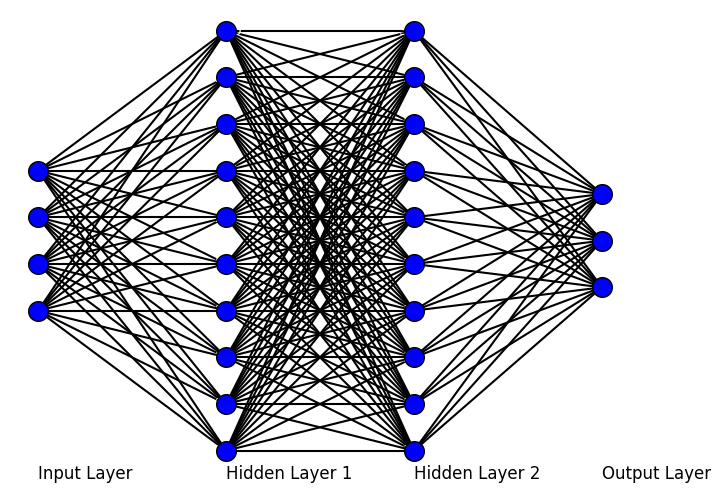

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_model():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')

    # Layer configurations
    layer_sizes = [4, 10, 10, 3]  # Input size, hidden layers, and output size

    v_spacing = 1.0  # vertical spacing between layers
    h_spacing = 0.5  # horizontal spacing between nodes in a layer

    # Positions of each neuron
    layer_positions = []
    for i, size in enumerate(layer_sizes):
        layer_positions.append(np.linspace(-0.5 * (size - 1), 0.5 * (size - 1), size))

    # Plot neurons
    for i, layer in enumerate(layer_positions):
        for j, y in enumerate(layer):
            ax.scatter(i * h_spacing, y * v_spacing, s=200, color='b', edgecolor='k', zorder=5)
            ax.text(i * h_spacing, y * v_spacing, f's{i+1}.{j+1}', fontsize=10, ha='center', va='center', color='w')

    # Plot connections between neurons
    for i in range(len(layer_positions) - 1):
        for a in layer_positions[i]:
            for b in layer_positions[i + 1]:
                ax.plot([i * h_spacing, (i + 1) * h_spacing], [a * v_spacing, b * v_spacing], color='k')

    # Layer labels
    ax.text(0 * h_spacing, -5 * v_spacing, 'Input Layer', fontsize=12, ha='left', va='center')
    ax.text(1 * h_spacing, -5 * v_spacing, 'Hidden Layer 1', fontsize=12, ha='left', va='center')
    ax.text(2 * h_spacing, -5 * v_spacing, 'Hidden Layer 2', fontsize=12, ha='left', va='center')
    ax.text(3 * h_spacing, -5 * v_spacing, 'Output Layer', fontsize=12, ha='left', va='center')

    plt.show()

# Call the function to visualize the model
visualize_model()


In [ ]:
import numpy as np

def step_function(x):
    return np.where(x > 0, 1, 0)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size + 1)  # including the bias term

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(y)):
                # Compute the prediction
                prediction = self.predict(X[i])
                # Update weights
                self.weights[1:] += self.learning_rate * (y[i] - prediction) * X[i]
                self.weights[0] += self.learning_rate * (y[i] - prediction)  # Update bias

    def predict(self, x):
        # Compute the weighted sum and apply the step function
        weighted_sum = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(weighted_sum)

# AND gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Output of AND gate

# Initialize the Perceptron
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the Perceptron
perceptron.fit(X, y)

# Make predictions on the training data
print("Training data and predictions:")
for x in X:
    print(f"Input: {x}, Prediction: {perceptron.predict(x)}")


Training data and predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


###final

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Flatten and normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0    # Flatten and normalize

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the single-layer perceptron model
model = Sequential([
    Dense(10, input_shape=(784,), activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print the first 10 predictions
for i in range(10):
    print(f"True class: {true_classes[i]}, Predicted class: {predicted_classes[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6978 - loss: 1.1827 - val_accuracy: 0.8950 - val_loss: 0.4490
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8734 - loss: 0.4973 - val_accuracy: 0.9065 - val_loss: 0.3669
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8859 - loss: 0.4286 - val_accuracy: 0.9125 - val_loss: 0.3324
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8927 - loss: 0.3952 - val_accuracy: 0.9187 - val_loss: 0.3135
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8973 - loss: 0.3732 - val_accuracy: 0.9188 - val_loss: 0.3021
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8992 - loss: 0.3638 - val_accuracy: 0.9212 - val_loss: 0.2931
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9023 - loss: 0.3510 - val_accuracy: 0.9237 - val_loss: 0.2865
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9051 - loss: 0.3405 - 

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7318 - loss: 1.0397 - val_accuracy: 0.9143 - val_loss: 0.3239
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8964 - loss: 0.3689 - val_accuracy: 0.9258 - val_loss: 0.2603
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9114 - loss: 0.3085 - val_accuracy: 0.9345 - val_loss: 0.2300
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9212 - loss: 0.2745 - val_accuracy: 0.9425 - val_loss: 0.2074
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9301 - loss: 0.2487 - val_accuracy: 0.9447 - val_loss: 0.1933
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9378 - loss: 0.2221 - val_accuracy: 0.9510 - val_loss: 0.1805
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9413 - loss: 0.2096 - val_accuracy: 0.9562 - val_loss: 0.1672
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9435 - loss: 0.1996 - 

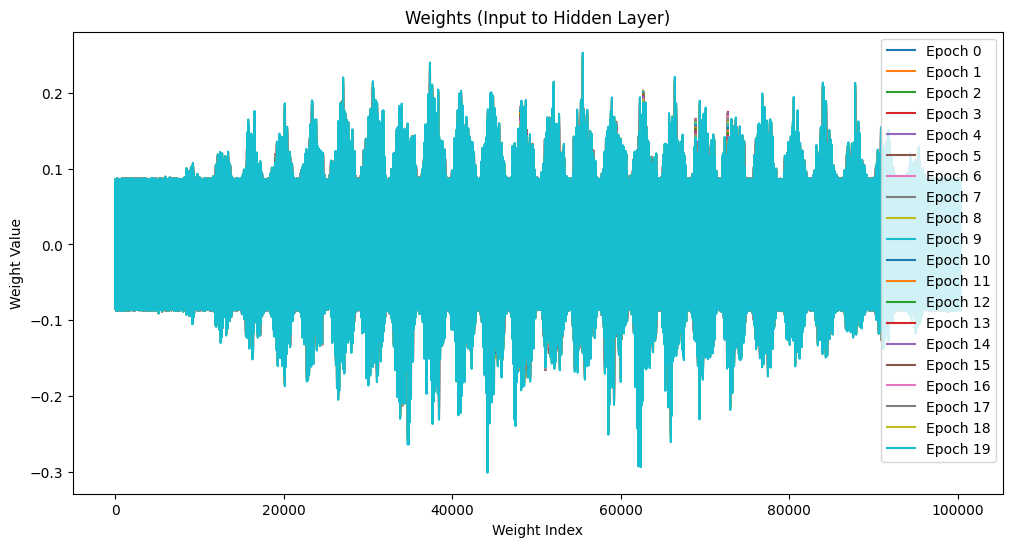

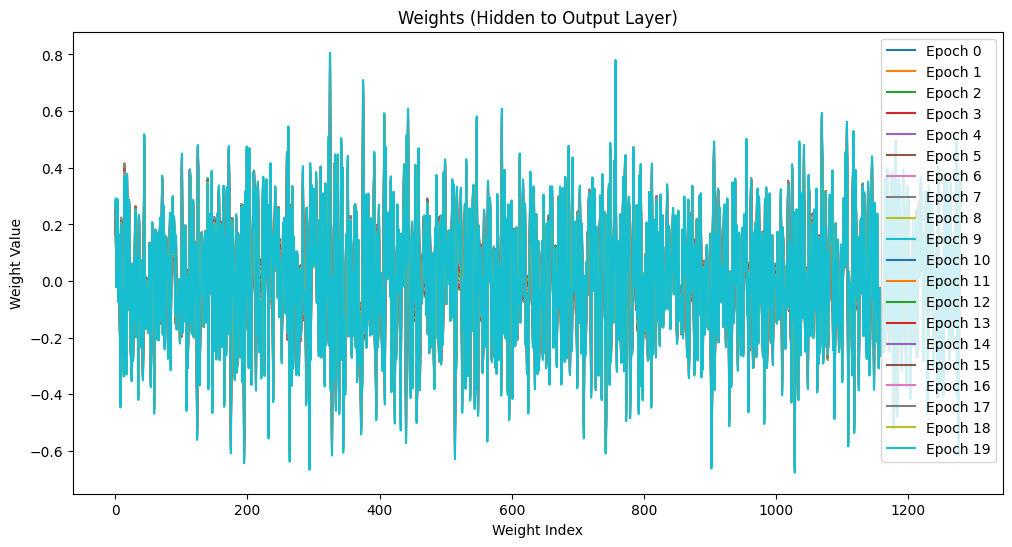

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
True class: 7, Predicted class: 7
True class: 2, Predicted class: 2
True class: 1, Predicted class: 1
True class: 0, Predicted class: 0
True class: 4, Predicted class: 4
True class: 1, Predicted class: 1
True class: 4, Predicted class: 4
True class: 9, Predicted class: 9
True class: 5, Predicted class: 6
True class: 9, Predicted class: 9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import LambdaCallback

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28*28).astype('float32') / 255
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the multi-layer feedforward neural network
model = Sequential([
    Dense(128, input_shape=(784,), activation='relu', kernel_initializer='he_uniform'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to record weights
weights_history = []

def record_weights(epoch, logs):
    weights_history.append(model.get_weights())

weight_callback = LambdaCallback(on_epoch_end=record_weights)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[weight_callback])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Function to plot weights
def plot_weights(weights_history, layer_index, title):
    plt.figure(figsize=(12, 6))
    for epoch, weights in enumerate(weights_history):
        plt.plot(weights[layer_index].flatten(), label=f'Epoch {epoch}')
    plt.xlabel('Weight Index')
    plt.ylabel('Weight Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot weights for the first dense layer (input to hidden)
plot_weights(weights_history, 0, 'Weights (Input to Hidden Layer)')

# Plot weights for the second dense layer (hidden to output)
plot_weights(weights_history, 2, 'Weights (Hidden to Output Layer)')

# Backpropagation verification

# Simple manual implementation of forward pass for a single example
def forward_pass(X, weights):
    layer1 = np.maximum(0, np.dot(X, weights[0]) + weights[1])  # ReLU activation
    output = np.exp(np.dot(layer1, weights[2]) + weights[3])
    output = output / np.sum(output, axis=1, keepdims=True)  # Softmax
    return output

# Manual implementation of the loss function (cross-entropy)
def compute_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

# Gradient check
def gradient_check(X, y_true, weights, epsilon=1e-5):
    loss_before = compute_loss(y_true, forward_pass(X, weights))
    for i in range(len(weights)):
        weights_plus = weights.copy()
        weights_plus[i] += epsilon
        loss_plus = compute_loss(y_true, forward_pass(X, weights_plus))
        weights_minus = weights.copy()
        weights_minus[i] -= epsilon
        loss_minus = compute_loss(y_true, forward_pass(X, weights_minus))

        estimated_gradient = (loss_plus - loss_minus) / (2 * epsilon)
        print(f'Gradient check for weight {i}: {estimated_gradient:.5e}')

# Example usage of gradient check (requires proper gradient computation implementation)
# gradient_check(X_train[:10], y_train[:10], model.get_weights())

# Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print the first 10 predictions
for i in range(10):
    print(f"True class: {true_classes[i]}, Predicted class: {predicted_classes[i]}")


# EXP_2: Vanishing *Gradient*

### Task Aim
####Implement and train a neural network on the MNIST dataset using stochastic gradient descent (SGD) to address and reduce the vanishing gradient problem in a multilayer model.

### Learning Outcome
#### The code applies stochastic gradient descent (SGD) on the MNIST dataset to train a neural network, aiming to mitigate the vanishing gradient problem in a multilayer model.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Set the learning rate and optimizer
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7210 - loss: 1.0371 - val_accuracy: 0.9149 - val_loss: 0.3063
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9171 - loss: 0.2955 - val_accuracy: 0.9295 - val_loss: 0.2430
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9331 - loss: 0.2351 - val_accuracy: 0.9416 - val_loss: 0.2035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9417 - loss: 0.2073 - val_accuracy: 0.9495 - val_loss: 0.1782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9504 - loss: 0.1735 - val_accuracy: 0.9532 - val_loss: 0.1610
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9565 - loss: 0.1553 - val_accuracy: 0.9556 - val_loss: 0.1491
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9589 - loss: 0.1438 - val_accuracy: 0.9591 - val_loss: 0.1362
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9648 - loss: 0.1276 

In [ ]:
""" import matplotlib.pyplot as plt
import numpy as np

def visualize_model():
    fig, ax = plt.subplots(figsize=(300, 250))  # Further increase figure size
    ax.axis('off')

    # Layer configurations
    layer_sizes = [784, 128, 64, 10]  # Input size, hidden layers, and output size

    v_spacing = 10  # Increase vertical spacing between layers to reduce clutter
    h_spacing = 6  # Further increase horizontal spacing between nodes in a layer

    # Positions of each neuron
    layer_positions = []
    for i, size in enumerate(layer_sizes):
        layer_positions.append(np.linspace(-0.5 * (size - 1), 0.5 * (size - 1), size))

    # Plot neurons
    for i, layer in enumerate(layer_positions):
        for j, y in enumerate(layer):
            ax.scatter(i * h_spacing, y * v_spacing, s=500, color='b', edgecolor='k', zorder=5)  # Further increase neuron size
            if i == 0:  # Label input layer neurons
                ax.text(i * h_spacing - 0.3, y * v_spacing, f'I{j+1}', fontsize=8, ha='right', va='center', color='k')
            elif i == len(layer_sizes) - 1:  # Label output layer neurons
                ax.text(i * h_spacing + 0.3, y * v_spacing, f'O{j+1}', fontsize=8, ha='left', va='center', color='k')
            else:  # Label hidden layers neurons
                ax.text(i * h_spacing, y * v_spacing, f'{j+1}', fontsize=6, ha='center', va='center', color='w')

    # Plot connections between neurons
    for i in range(len(layer_positions) - 1):
        for a in layer_positions[i]:
            for b in layer_positions[i + 1]:
                ax.plot([i * h_spacing, (i + 1) * h_spacing], [a * v_spacing, b * v_spacing], color='k')""

    # Layer labels at the bottom, aligned to the left
    ax.text(0 * h_spacing, -4 * v_spacing, 'Input Layer', fontsize=14, ha='left', va='center')
    ax.text(1 * h_spacing, -4 * v_spacing, 'Hidden Layer 1', fontsize=14, ha='left', va='center')
    ax.text(2 * h_spacing, -4 * v_spacing, 'Hidden Layer 2', fontsize=14, ha='left', va='center')
    ax.text(3 * h_spacing, -4 * v_spacing, 'Output Layer', fontsize=14, ha='left', va='center')

    plt.show()

# Call the function to visualize the model
visualize_model() """


' import matplotlib.pyplot as plt\nimport numpy as np\n\ndef visualize_model():\n    fig, ax = plt.subplots(figsize=(300, 250))  # Further increase figure size\n    ax.axis(\'off\')\n\n    # Layer configurations\n    layer_sizes = [784, 128, 64, 10]  # Input size, hidden layers, and output size\n\n    v_spacing = 10  # Increase vertical spacing between layers to reduce clutter\n    h_spacing = 6  # Further increase horizontal spacing between nodes in a layer\n\n    # Positions of each neuron\n    layer_positions = []\n    for i, size in enumerate(layer_sizes):\n        layer_positions.append(np.linspace(-0.5 * (size - 1), 0.5 * (size - 1), size))\n\n    # Plot neurons\n    for i, layer in enumerate(layer_positions):\n        for j, y in enumerate(layer):\n            ax.scatter(i * h_spacing, y * v_spacing, s=500, color=\'b\', edgecolor=\'k\', zorder=5)  # Further increase neuron size\n            if i == 0:  # Label input layer neurons\n                ax.text(i * h_spacing - 0.3, y *

# Exp_3 : Momentum

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

learning_rate = 0.01
momentum = 0.9
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8528 - loss: 0.4887 - val_accuracy: 0.9542 - val_loss: 0.1460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9596 - loss: 0.1334 - val_accuracy: 0.9683 - val_loss: 0.1004
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9724 - loss: 0.0917 - val_accuracy: 0.9689 - val_loss: 0.0925
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9796 - loss: 0.0647 - val_accuracy: 0.9703 - val_loss: 0.0958
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9836 - loss: 0.0519 - val_accuracy: 0.9758 - val_loss: 0.0752
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0425 - val_accuracy: 0.9763 - val_loss: 0.0809
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9728 - val_loss: 0.0962
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9912 - loss: 0.0293

# Exp_4: RF iris data and deep learning Feature Extraction

# Iris dataset
- optimizer SGD
- sparse_categorical_crossentropy
- 0, 1, 2 normalization
- Important feature from hidden layers(not from the output layeres) and then fitting them into the keras, tensorflow, SVC and RF
- Modern model and traditional model of the machine learning and deep learning
- Hybrid model of neural network and traditional deep learning will provide the more accuracy
- Fitting and Accuracy Evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import tensorflow as tf

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

inputs = Input(shape=(4,))
x = Dense(64, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)

nn_model = Model(inputs=inputs, outputs=outputs)

nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
epochs = 100
batch_size = 32
history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                       validation_split=0.2, verbose=0, callbacks=[early_stopping])

intermediate_layer_model = Model(inputs=nn_model.input, outputs=nn_model.layers[1].output)
hidden_features_train = intermediate_layer_model.predict(X_train)
hidden_features_test = intermediate_layer_model.predict(X_test)

svc_params = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5)
svc_model.fit(hidden_features_train, y_train)
svc_pred = svc_model.predict(hidden_features_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(hidden_features_train, y_train)
rf_pred = rf_model.predict(hidden_features_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

print(f'Neural Network Accuracy: {nn_accuracy * 100:.2f}%')
print(f'SVM Accuracy: {svc_accuracy * 100:.2f}%')
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

hybrid_accuracy = (nn_accuracy * 0.3 + svc_accuracy * 0.35 + rf_accuracy * 0.35)
print(f'Hybrid Model Accuracy Estimate: {hybrid_accuracy * 100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Neural Network Accuracy: 93.33%
SVM Accuracy: 96.67%
Random Forest Accuracy: 100.00%
Hybrid Model Accuracy Estimate: 96.83%


#Exercise
##Regression problem using NN - House Price Dataset

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3405 - mae: 0.7725 - val_loss: 0.9838 - val_mae: 0.7146
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7300 - mae: 0.6305 - val_loss: 0.5426 - val_mae: 0.5230
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5242 - mae: 0.5229 - val_loss: 0.5207 - val_mae: 0.5602
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4594 - mae: 0.4918 - val_loss: 0.5217 - val_mae: 0.5384
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4618 - mae: 0.4876 - val_loss: 0.4419 - val_mae: 0.4718
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4048 - mae: 0.4574 - val_loss: 0.6309 - val_mae: 0.5405
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4020 - mae: 0.4513 - val_loss: 0.4044 - val_mae: 0.4420
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3803 - mae: 0.4392 - val_loss: 0.4328 - val_mae: 0.4636
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4016 

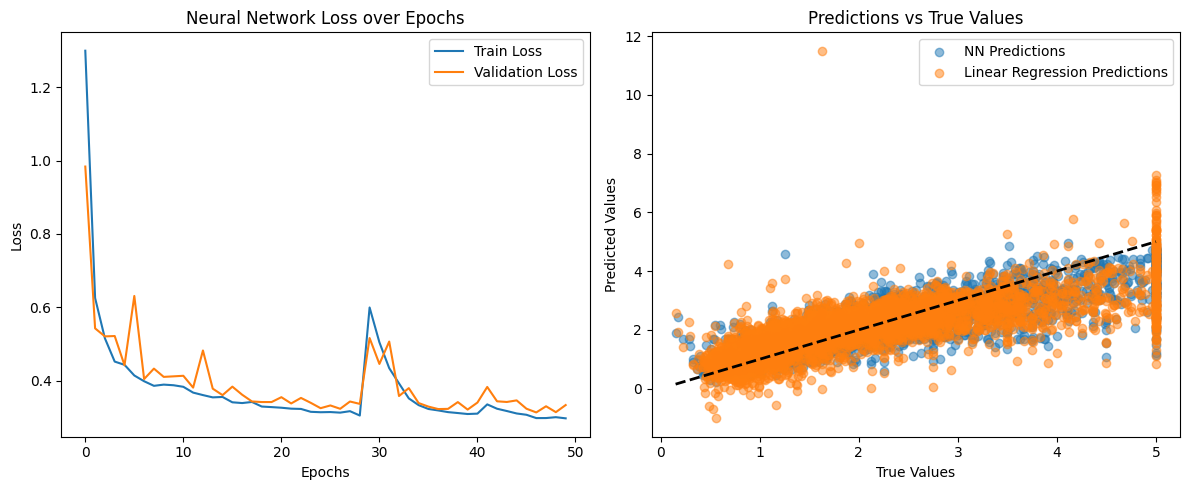

First 5 Neural Network Predictions: [0.52264464 1.4974144  3.9148626  2.4239256  2.1487093 ]
First 5 Linear Regression Predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
First 5 True Values: [0.477   0.458   5.00001 2.186   2.78   ]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model using the SGD optimizer
nn_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error', metrics=['mae'])

# Train the Neural Network model
nn_history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the Neural Network model on the test set
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print(f"Neural Network - MSE: {nn_mse}, MAE: {nn_mae}, R²: {nn_r2}")

# Train a Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions using Linear Regression
lin_reg_predictions = lin_reg_model.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_predictions)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)

print(f"Linear Regression - MSE: {lin_reg_mse}, MAE: {lin_reg_mae}, R²: {lin_reg_r2}")

# Plot training & validation loss for Neural Network
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['loss'], label='Train Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot predictions vs true values for both models
plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_predictions, label='NN Predictions', alpha=0.5)
plt.scatter(y_test, lin_reg_predictions, label='Linear Regression Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

# Show some predictions
print(f"First 5 Neural Network Predictions: {nn_predictions[:5].flatten()}")
print(f"First 5 Linear Regression Predictions: {lin_reg_predictions[:5]}")
print(f"First 5 True Values: {y_test.values[:5]}")


In [ ]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target #To see the dataset

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model using the SGD optimizer
nn_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='mean_squared_error', metrics=['mae'])

# Train the Neural Network model
nn_history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the Neural Network model on the test set
nn_predictions = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print(f"Neural Network Metrics:\nMSE: {nn_mse:.4f}, MAE: {nn_mae:.4f}, R²: {nn_r2:.4f}")

# Train a Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Make predictions using Linear Regression
lin_reg_predictions = lin_reg_model.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_predictions)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)

print(f"\nLinear Regression Metrics:\nMSE: {lin_reg_mse:.4f}, MAE: {lin_reg_mae:.4f}, R²: {lin_reg_r2:.4f}")

# Plot training & validation loss for Neural Network
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nn_history.history['loss'], label='Train Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot predictions vs true values for both models
plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_predictions, label='NN Predictions', alpha=0.5)
plt.scatter(y_test, lin_reg_predictions, label='Linear Regression Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

# Show some predictions
print(f"\nFirst 5 Neural Network Predictions: {nn_predictions[:5].flatten()}")
print(f"First 5 Linear Regression Predictions: {lin_reg_predictions[:5]}")
print(f"First 5 True Values: {y_test.values[:5]}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.9000 - mae: 0.6699 - val_loss: 0.9504 - val_mae: 0.5259
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━

ValueError: Input contains NaN.

#Exp: 6th CNN Padding


### Padding 'same' maintains the spatial dimensions after convolution.
### Padding 'valid' reduces the dimensions, and combining it with stride = 2 further reduces the size of the feature maps.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 153s 77ms/step - accuracy: 0.7991 - loss: 0.5670 - val_accuracy: 0.8345 - val_loss: 0.4401
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 183s 67ms/step - accuracy: 0.8814 - loss: 0.3218 - val_accuracy: 0.8730 - val_loss: 0.3478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 67ms/step - accuracy: 0.8999 - loss: 0.2756 - val_accuracy: 0.8880 - val_loss: 0.3058
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - accuracy: 0.9111 - loss: 0.2419 - val_accuracy: 0.8885 - val_loss: 0.2978
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 65ms/step - accuracy: 0.9208 - loss: 0.2139 - val_accuracy: 0.8884 - val_loss: 0.2969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 0.9293 - loss: 0.1907 - val_accuracy: 0.9017 - val_loss: 0.2766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 67ms/step - accuracy: 0.9328 - loss: 0.1781 - val_accuracy: 0.8972 - val_loss: 0.2952
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 65ms/step - accuracy: 

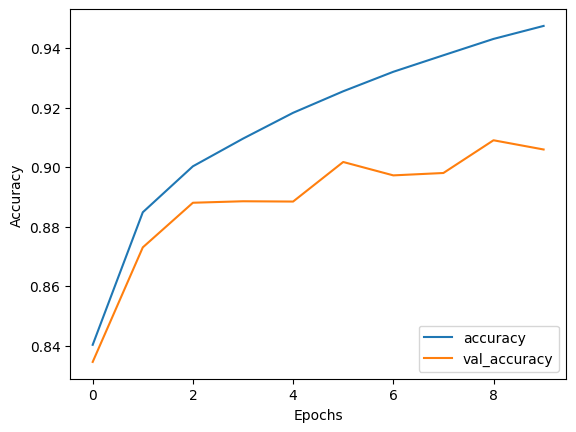

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='valid', strides=2),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


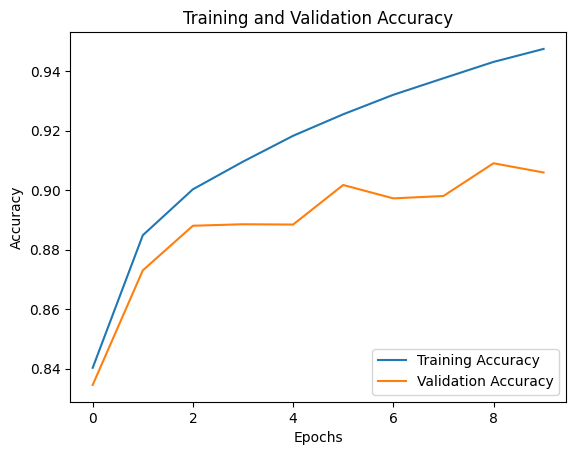

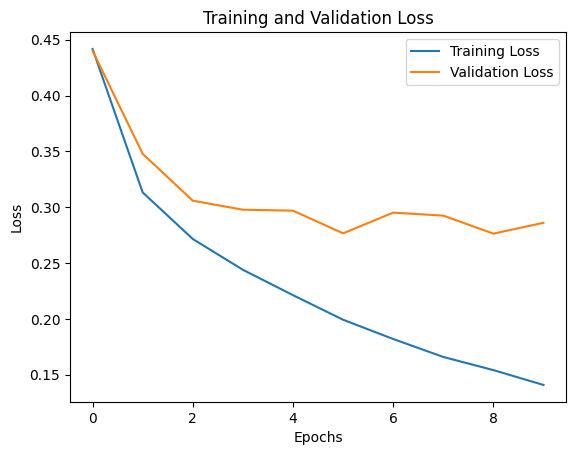

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#EXP-5: Implement a simple feed forward neural network network with Adagrad optimizer.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
import numpy as np


model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(32,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))


adagrad = Adagrad(learning_rate=0.01)
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


X_train = np.random.rand(1000, 32)
y_train = np.random.randint(3, size=(1000,))

model.fit(X_train, y_train, epochs=10, batch_size=32)


X_test = np.random.rand(200, 32)
y_test = np.random.randint(3, size=(200,))


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,659 (57.26 KB)

 Trainable params: 14,659 (57.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3027 - loss: 1.1071
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3466 - loss: 1.1013
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3645 - loss: 1.0965
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3696 - loss: 1.0908
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 1.0899
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3350 - loss: 1.0957
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4150 - loss: 1.0898
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3830 - loss: 1.0873  
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3988 - loss: 1.0886 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4137 - loss: 1.0867 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 1.1032  
Test Loss: 1.1058104038238525, Test Accuracy: 0.32499998807907104


 ### Above Low Accuracy: Adagrad

Adagrad with mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

adagrad = Adagrad(learning_rate=0.01)
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7397 - loss: 0.8778 - val_accuracy: 0.9258 - val_loss: 0.2603
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9311 - loss: 0.2424 - val_accuracy: 0.9466 - val_loss: 0.1943
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9458 - loss: 0.1852 - val_accuracy: 0.9526 - val_loss: 0.1672
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9558 - loss: 0.1526 - val_accuracy: 0.9590 - val_loss: 0.1463
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9609 - loss: 0.1325 - val_accuracy: 0.9612 - val_loss: 0.1354
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1177 - val_accuracy: 0.9622 - val_loss: 0.1307
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9717 - loss: 0.1008 - val_accuracy: 0.9653 - val_loss: 0.1204
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0910 - 

In [ ]:
import matplotlib.pyplot as plt


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7401 - loss: 0.8722 - val_accuracy: 0.9242 - val_loss: 0.2580
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9295 - loss: 0.2483 - val_accuracy: 0.9427 - val_loss: 0.1967
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9464 - loss: 0.1882 - val_accuracy: 0.9548 - val_loss: 0.1645
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9529 - loss: 0.1615 - val_accuracy: 0.9593 - val_loss: 0.1452
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9610 - loss: 0.1346 - val_accuracy: 0.9612 - val_loss: 0.1382
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9668 - loss: 0.1166 - val_accuracy: 0.9638 - val_loss: 0.1285
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9687 - loss: 0.1087 - val_accuracy: 0.9639 - val_loss: 0.1194
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9728 - loss: 0.0957 

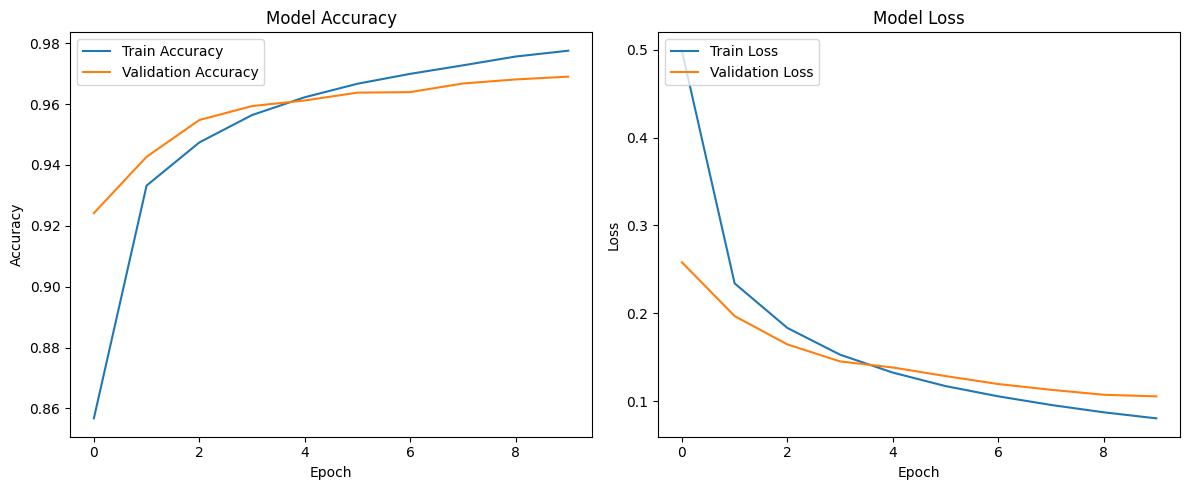

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adagrad

(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

adagrad = Adagrad(learning_rate=0.01)
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


#EXP-7 : Implement Greedy Layer wise pre-trainig in neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28*28).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

mlp = keras.models.Sequential()
mlp.add(keras.layers.Dense(units=512, activation='tanh', kernel_initializer='he_uniform', input_shape=(28*28,)))
mlp.add(keras.layers.Dense(units=10, activation='softmax', kernel_initializer='he_uniform'))
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

output_layer = mlp.layers[-1]

mlp.pop()
for layer in mlp.layers:
    layer.trainable = False

mlp.add(keras.layers.Dense(units=512, activation='tanh', kernel_initializer='he_uniform'))
mlp.add(output_layer)

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7680 - loss: 0.1243 - val_accuracy: 0.8476 - val_loss: 0.0793
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8632 - loss: 0.0709 - val_accuracy: 0.8538 - val_loss: 0.0743
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8761 - loss: 0.0642 - val_accuracy: 0.8691 - val_loss: 0.0666
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8838 - loss: 0.0583 - val_accuracy: 0.8741 - val_loss: 0.0632
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8906 - loss: 0.0553 - val_accuracy: 0.8762 - val_loss: 0.0633
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8987 - loss: 0.0516 - val_accuracy: 0.8788 - val_loss: 0.0626
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9044 - loss: 0.0494 - val_accuracy: 0.8773 - val_loss: 0.0611
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9088 - loss: 0.0468 - val_acc

In [ ]:
test_loss, test_accuracy = mlp.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8889 - loss: 0.3521
Test Accuracy: 88.65%


#Exp-8: Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

#(28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


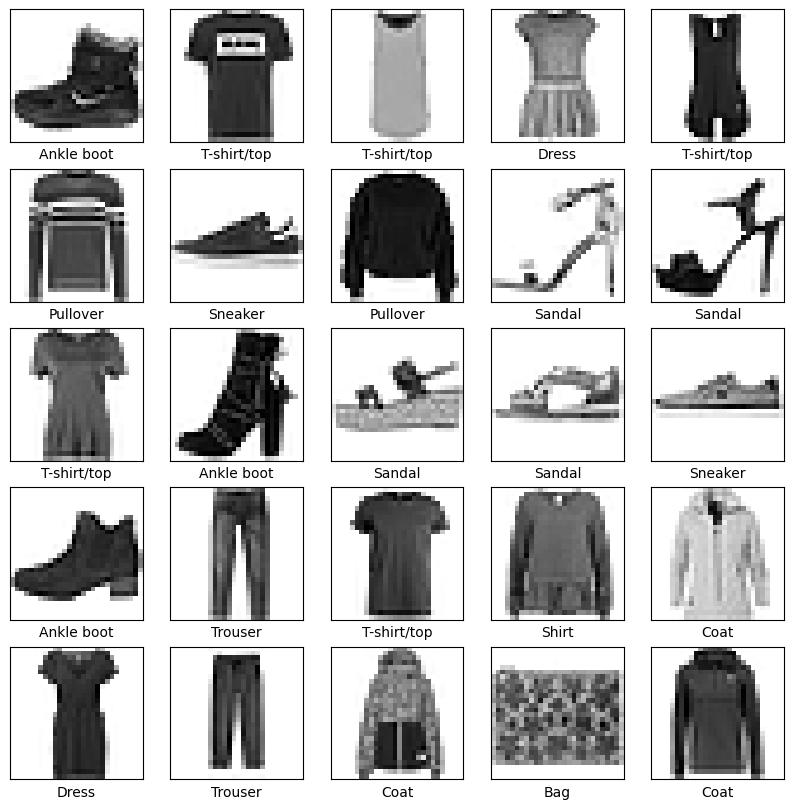

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 59ms/step - accuracy: 0.7462 - loss: 0.6981 - val_accuracy: 0.8649 - val_loss: 0.3692
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 36ms/step - accuracy: 0.8816 - loss: 0.3255 - val_accuracy: 0.8840 - val_loss: 0.3254
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.8991 - loss: 0.2716 - val_accuracy: 0.8914 - val_loss: 0.2898
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9130 - loss: 0.2370 - val_accuracy: 0.8974 - val_loss: 0.2895
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 38ms/step - accuracy: 0.9193 - loss: 0.2192 - val_accuracy: 0.9023 - val_loss: 0.2602
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9291 - loss: 0.1916 - val_accuracy: 0.9058 - val_loss: 0.2572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 40ms/step - accuracy: 0.9339 - loss: 0.1744 - val_accuracy: 0.9078 - val_loss: 0.2614
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9389

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 3s - 10ms/step - accuracy: 0.9079 - loss: 0.2717

Test accuracy: 0.91


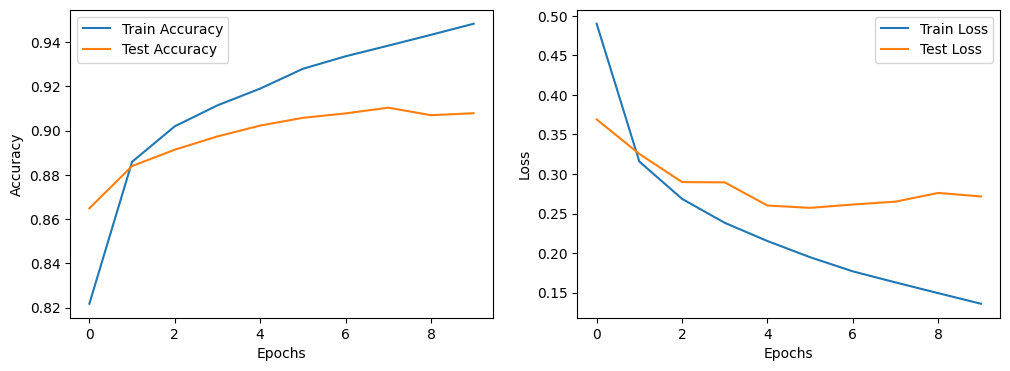

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


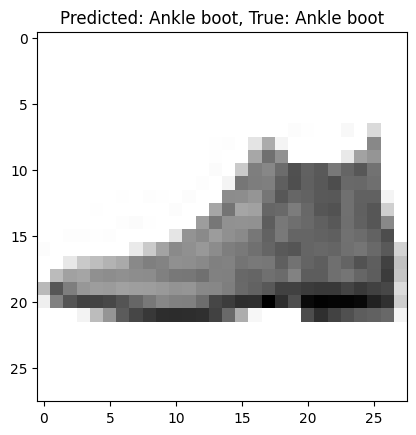

In [ ]:
import numpy as np
predictions = model.predict(X_test)

plt.figure()
plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {class_names[np.argmax(predictions[0])]}, True: {class_names[y_test[0]]}")
plt.show()


##implementation

In [ ]:
import tensorflow as tf
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = tf.image.resize(X_train, (224, 224))
X_test = tf.image.resize(X_test, (224, 224))

X_train = np.repeat(X_train, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

X_train, X_test = X_train / 255.0, X_test / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np

predictions = model.predict(X_test)

plt.figure()
plt.imshow(X_test[0].reshape(224, 224, 3))
plt.title(f"Predicted: {np.argmax(predictions[0])}, True: {y_test[0]}")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
    ])
    return model

# Compile the CNN model
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(x_test, y_test)

print(f'CNN Test Accuracy: {cnn_test_accuracy * 100:.2f}%')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7280 - loss: 0.7506 - val_accuracy: 0.8619 - val_loss: 0.3775
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8607 - loss: 0.3883 - val_accuracy: 0.8847 - val_loss: 0.3239
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8800 - loss: 0.3265 - val_accuracy: 0.8912 - val_loss: 0.3020
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8909 - loss: 0.3023 - val_accuracy: 0.8935 - val_loss: 0.2830
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9005 - loss: 0.2738 - val_accuracy: 0.9041 - val_loss: 0.2696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9082 - loss: 0.2439 - val_accuracy: 0.9069 - val_loss: 0.2601
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9138 - loss: 0.2329 - val_accuracy: 0.9032 - val_loss: 0.2724
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9196 - loss: 0.217

In [ ]:
# Convert grayscale images to RGB to fit MobileNetV2 requirements
x_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Resize images to 32x32 to fit MobileNetV2 input requirements
x_train_resized = tf.image.resize(x_train_rgb, (32, 32))
x_test_resized = tf.image.resize(x_test_rgb, (32, 32))

# Use MobileNetV2 as a feature extractor for transfer learning
base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# Build a model for transfer learning
def create_transfer_learning_model():
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
    ])
    return model

# Compile the transfer learning model
transfer_model = create_transfer_learning_model()
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the transfer learning model
transfer_history = transfer_model.fit(x_train_resized, y_train, epochs=10, batch_size=32, validation_data=(x_test_resized, y_test))

# Evaluate the transfer learning model
transfer_test_loss, transfer_test_accuracy = transfer_model.evaluate(x_test_resized, y_test)

print(f'Transfer Learning Test Accuracy: {transfer_test_accuracy * 100:.2f}%')


<ipython-input-5-6b3354c0c62e>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.5162 - loss: 1.4031 - val_accuracy: 0.6334 - val_loss: 1.0126
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6222 - loss: 1.0440 - val_accuracy: 0.6502 - val_loss: 0.9676
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6366 - loss: 1.0010 - val_accuracy: 0.6577 - val_loss: 0.9475
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6463 - loss: 0.9734 - val_accuracy: 0.6607 - val_loss: 0.9339
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6558 - loss: 0.9498 - val_accuracy: 0.6665 - val_loss: 0.9235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6539 - loss: 0.9455 - val_accuracy: 0.6666 - val_loss: 0.9146
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6552 - loss: 0.9496 - val_accuracy: 0.6677 - val_loss: 0.9103
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.6608 - loss: 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import EfficientNetB0

# Enable mixed precision for memory optimization (optional)
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load and preprocess the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert grayscale images to RGB to fit EfficientNet input requirements
x_train_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train))
x_test_rgb = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test))

# Resize images to 128x128 to reduce memory usage and fit EfficientNet input size
x_train_resized = tf.image.resize(x_train_rgb, (128, 128))
x_test_resized = tf.image.resize(x_test_rgb, (128, 128))

# Load EfficientNetB0 model with pre-trained weights (without top layers)
base_model = EfficientNetB0(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the pre-trained layers

# Build the transfer learning model
model = Sequential([
    base_model,
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model with 'adam' optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with a reduced batch size (e.g., 8) to save memory
history = model.fit(x_train_resized, y_train, epochs=10, batch_size=8, validation_data=(x_test_resized, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)

print(f'EfficientNetB0 Transfer Learning Test Accuracy: {test_accuracy * 100:.2f}%')


#EXP_6_DL_FINAL

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 178s 91ms/step - accuracy: 0.8087 - loss: 0.5433 - val_accuracy: 0.8337 - val_loss: 0.4449
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 166s 72ms/step - accuracy: 0.9045 - loss: 0.2715 - val_accuracy: 0.8965 - val_loss: 0.2861
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 147s 75ms/step - accuracy: 0.9168 - loss: 0.2329 - val_accuracy: 0.8987 - val_loss: 0.3026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 76ms/step - accuracy: 0.9245 - loss: 0.2065 - val_accuracy: 0.8994 - val_loss: 0.2831
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 71ms/step - accuracy: 0.9329 - loss: 0.1873 - val_accuracy: 0.9027 - val_loss: 0.2724
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 70ms/step - accuracy: 0.9375 - loss: 0.1693 - val_accuracy: 0.8937 - val_loss: 0.2970
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 70ms/step - accuracy: 0.9441 - loss: 0.1533 - val_accuracy: 0.8947 - val_loss: 0.3053
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 

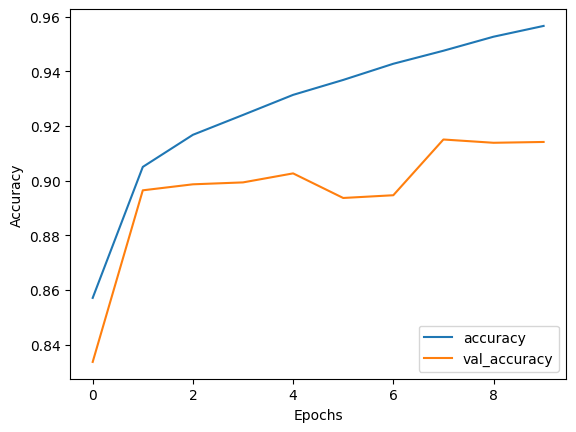

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add the color channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Define the CNN model
model = models.Sequential([
    # First convolutional block with 'same' padding and max pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block with 'same' padding and max pooling
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block with 'valid' padding and global average pooling
    layers.Conv2D(128, (3, 3), activation='relu', padding='valid', strides=1),
    layers.BatchNormalization(),

    # Apply Global Average Pooling instead of Flattening
    layers.GlobalAveragePooling2D(),

    # Output layer for classification
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
